In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import cupy as cp
import cv2
from matplotlib import pyplot as plt 
import numpy as np
import sklearn
import math
import random
circle = cv2.imread('circle.jpg')
row = circle.shape[0]
column = circle.shape[1]
point = []
inlier = -1
Grange = [1,10000]
pBarLength = 70

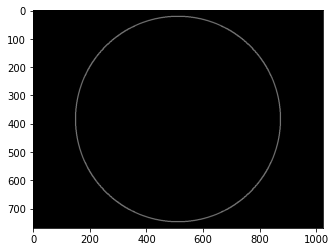

In [2]:
circle = cv2.Canny(circle,50,100)
plt.imshow(circle,cmap = 'gray')
point = []
for i in range(row):
    for j in range(column):
        if circle[i,j] == 255:
            point.append([i,j])

In [3]:
def ThreePoint(img):
    x1 = 0
    x2 = 0
    val = random.sample(point,3)
    y1 = 0
    y2 = 0
    while abs(x1 == 0) or abs(x2 == 0) or abs(y1 == 0) or abs(y2 == 0)  :
        val = random.sample(point,3)
        x1 = (val[0][0] - val[1][0]) 
        y1 = (val[0][1] - val[1][1]) 
        x2 = (val[1][0] - val[2][0]) 
        y2 = (val[1][1] - val[2][1])
            
    return val

def Bisector(val):
    x1 = (val[0][0] - val[1][0]) 
    y1 = (val[0][1] - val[1][1]) 
    x2 = (val[1][0] - val[2][0]) 
    y2 = (val[1][1] - val[2][1])
    midx1 = ((val[0][0]) + (val[1][0]))/ 2 
    midy1 = ((val[0][1]) + (val[1][1]))/ 2
    midx2 = ((val[1][0]) + (val[2][0]))/ 2
    midy2 = ((val[1][1]) + (val[2][1]))/ 2
    midp1 = [midx1, midy1]
    midp2 = [midx2, midy2]
    slope1 = y1/x1
    slope1 = -(1/slope1)
    slope2 = y2/x2
    slope2 = -(1/slope2)
    b1 = (midp1[1] - slope1 * midp1[0])
    b2 = (midp2[1] - slope2 * midp2[0])
    a = cp.array([[slope1,-1], [slope2, -1]])
    b = cp.array([-b1,-b2])
    x = cp.linalg.solve(a, b)
    return x


def Radius(center):
    val = random.sample(point,1)
    return math.sqrt(math.pow((val[0][0]-center[0]),2)+math.pow((val[0][1]-center[1]),2))

(511, 383)
363


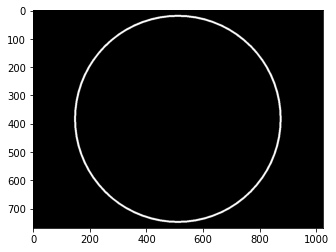

In [4]:
for z in range(0,1):
    center = ThreePoint(circle)
    center = Bisector(center)
    r = int(Radius(center))
    center = (int(center[1]),int(center[0]))
    print(center)
    print(r)
image1 = cv2.circle(circle, (center), r, (255,0,0), 5)
plt.imshow(image1,cmap = 'gray')

In [5]:
RANpoint = []
for i in range(row):
    for j in range(column):
            RANpoint.append([i,j])
            
            
def ThreeRandomPoint(RANpoint):
    val = random.sample(RANpoint,3)
    x1 = 0
    y1 = 0
    x2 = 0
    y2 = 0
    while abs(x1 <= 1) or abs(x2 <= 1) or abs(y1 <= 1) or abs(y2 <= 1) or abs((x1-x2) <=50) or abs((y1-y2)<=50) :
        val = random.sample(RANpoint,3)
        x1 = (val[0][0] - val[1][0]) 
        y1 = (val[0][1] - val[1][1]) 
        x2 = (val[1][0] - val[2][0]) 
        y2 = (val[1][1] - val[2][1])
        #s1 = y1/x1
        #slope1 = -(1/s1)
        #s2 = y2/x2
        #slope2 = -(1/s2)
    return val 

def RANlist(circle1):
    whitep = []
    for i in range(row):
        for j in range(column):
            if circle1[i,j] == 255:
                whitep.append([i,j])
    #plt.imshow(circle1,cmap = 'gray')
    return whitep
   
def Inliercal(whitep):
    inlier = 0
    inlier = len([x for x in whitep if x in point])
    return inlier


In [6]:
inlier = -1
k = 0
for i in range(Grange[0],Grange[1]+1):
    imgini = np.zeros((row,column),dtype = np.uint8)
    pval = ThreeRandomPoint(RANpoint)
    center = Bisector(pval)
    r = int(Radius(center))
    center = (int(center[1]),int(center[0]))
    circle1 = cv2.circle(imgini, (center), r, (255,0,0), 5)
    whitep = RANlist(circle1)
    k = Inliercal(whitep)
    pctge = (i - Grange[0]) / (Grange[1] - Grange[0])
    temp = int(round(pBarLength * pctge))
    print("\r"+(temp-1)*'█'+'█'+(pBarLength-temp)*'░'+str(round(pctge*100))+'%'+" For iteration ="+str(i),end=' ')
    if inlier < k: 
        inlier = k
        Radiusbest = r
        Centerbest = center
        print(i,inlier)
    if inlier >= 3000:
        break

print(inlier)
circle = cv2.imread('circle.jpg')
circle = cv2.Canny(circle,50,100)
circlebest = cv2.circle(circle, (Centerbest), Radiusbest, (255,0,0), 5)
plt.imshow(circlebest,cmap = 'gray')

█░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░0% For iteration =1 1 132
█░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░0% For iteration =30 30 153
█░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░0% For iteration =45 45 155
█░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░1% For iteration =51 51 238
█░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░1% For iteration =65 65 323
█░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░1% For iteration =75 75 389
█░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░2% For iteration =168 168 475
███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░5% For iteration =485 485 595
█████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░7% For iteration =713 713 675
████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░17% For iteration =1728 1728 1500
█████

KeyboardInterrupt: 